In [32]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from epi_policy.model import EpiModel


In [2]:
# Figure 1 - Marginal Benefit of ESS w/o heterogeneity
np.random.seed(0)
days = 365

base_model = EpiModel("/Users/abhay/Documents/XLab/epi-policy/data/metapopulation-inputs-master.xlsx") # type: ignore
base_model.generate_beta(work_travel_mixing = None)
base_model.initialize_state(days)
base_model.run_simulation(days)

base_model.results

NameError: name 'EpiModel' is not defined

In [5]:
# Figure 1 - Marginal Benefit of ESS w/o heterogeneity
np.random.seed(0)
days = 365

model2 = EpiModel("/Users/abhay/Documents/XLab/epi-policy/data/metapopulation-inputs-master-2.xlsx") # type: ignore
model2.generate_beta(work_travel_mixing = None)
model2.initialize_state(days)
model2.run_simulation(days)
model2.results

/Users/abhay/Documents/XLab/epi-policy/epi-policy/model.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat([self.results, pd.DataFrame(outputs, columns = columns)])


,day,jurisdiction,NPI,S,E,P,I,A,R,D
0,0.0,0.0,0.0,999738.0,62.0,0.0,179.0,0.0,21.0,2.0
1,0.0,1.0,0.0,999744.0,56.0,0.0,179.0,0.0,21.0,0.0
2,0.0,2.0,0.0,999752.0,48.0,0.0,176.0,0.0,24.0,0.0
3,0.0,3.0,0.0,999761.0,39.0,0.0,175.0,0.0,25.0,0.0
4,0.0,4.0,0.0,999757.0,43.0,0.0,173.0,0.0,27.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1,363.0,1.0,4.0,714822.0,2181.0,2342.0,3104.0,1726.0,275825.0,1201.0
2,363.0,2.0,3.0,712425.0,2825.0,2874.0,3287.0,1790.0,276799.0,1291.0
3,363.0,3.0,3.0,718841.0,2711.0,2633.0,3106.0,1628.0,271081.0,1218.0
4,363.0,4.0,4.0,720355.0,2185.0,2392.0,3233.0,1674.0,270161.0,1278.0


In [26]:
# Figure 1 - Marginal Benefit of ESS w/o heterogeneity
np.random.seed(0)
days = 365

model3 = EpiModel("/Users/abhay/Documents/XLab/epi-policy/data/metapopulation-inputs-master.xlsx") # type: ignore
model3.generate_beta(work_travel_mixing = None)
model3.initialize_state(days)
model3.survey_lag = np.array([6, 6, 6, 6, 13, 13])
model3.run_simulation(days)
#model3.results

/Users/abhay/Documents/XLab/epi-policy/epi-policy/model.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat([self.results, pd.DataFrame(outputs, columns = columns)])


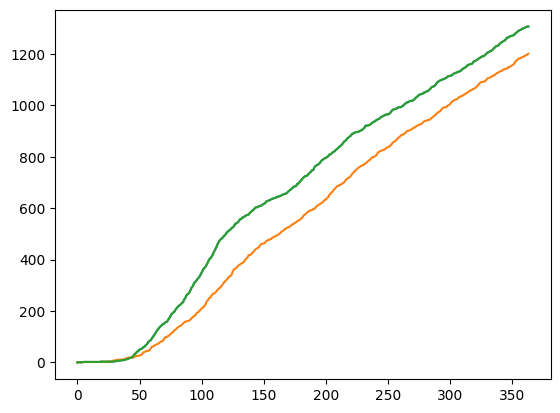

In [24]:
base_model_j1 = base_model.results[base_model.results["jurisdiction"] == 1]
model2_j1 = model2.results[model2.results["jurisdiction"] == 1]
model3_j1 = model3.results[model3.results["jurisdiction"] == 1]

plt.plot(base_model_j1["day"], base_model_j1["D"])
plt.plot(model2_j1["day"], model2_j1["D"])
plt.plot(model3_j1["day"], base_model_j1["D"])

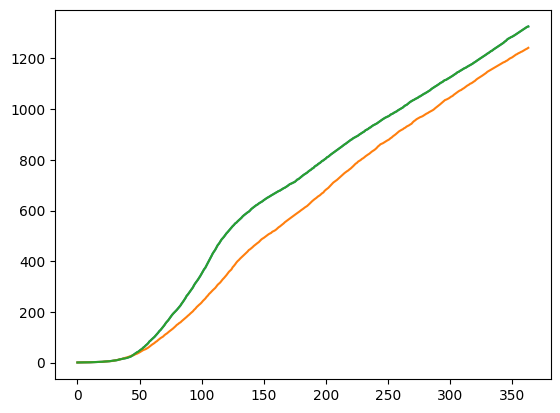

In [20]:
base_model_deaths = base_model.results.groupby('day')["D"].mean()
model2_deaths = model2.results.groupby('day')["D"].mean()
model3_deaths = model3.results.groupby('day')["D"].mean()


plt.plot(base_model_deaths)
plt.plot(model2_deaths)
plt.plot(model3_deaths)